In [82]:
# This reloads the extension if already loaded - Everytime you update the .py files, re-run this cell!
%reload_ext autoreload
# Automatically reloads modules before executing code OR makes Jupyter reload your .py files whenever you run a cell.
%autoreload 2

In [2]:
# # Importing all of the required python packages
# import sys
# import os

In [83]:
# Setting up the folder paths.
sys.path.append('./lib')

# # Import resuable code (scripts) within .py files.
# from data_loader import load_csv, save_df_to_csv
# from data_wrangle import add_cols, df_formater, remove_cols, remove_rows, col_name_changer, df_split

# **Section: Loading and converting data sets into DataFrames**

In [4]:
#df_indicators = load_csv('./data/raw/U.S._Chronic_Disease_Indicators.csv')
#print(df.head())

In [5]:
# df2 = load_csv('./data/raw/US_Census_Data_2022_v01.csv')
#print(df2.head())

In [6]:
#df_census = load_csv('./data/raw/US_Census_Data_2022_v03_transpose.csv')
#display(df3.head())

# **Section: Data Wrangling**

Census DataFrame: df_census
1. Adding the 'State' column to the dataframe.
2. Adding the correct state name to the newly created State column.
3. Removing blank columns
4. Removing blank rows
5. Split DataFrame into 2 separate DataFrames, 1 with state and 1 with city, state
6. Saves both datasets as 2 csv files at filepath: data/processed/

In [7]:
# col_names = ['State']
# df_census_temp0 = add_cols(df_census, col_names)
# display(df_census_temp0)    # For debugging only - comment out when not needed.

In [8]:
#df_census_temp1 = df_formater(df_census_temp0)
# display(df_census_temp1)    # For debugging only - comment out when not needed.

In [9]:
#df_census_temp2 = remove_cols(df_census_temp1)
#display(df_census_temp2)    # For debugging only - comment out when not needed.

In [10]:
# df_census_temp3 = remove_rows(df_census_temp2)
# #display(df_census_temp3)    # For debugging only - comment out when not needed.

In [11]:
# og_string = "!!"
# new_string = " -- "
# df_census_temp4 = col_name_changer(df_census_temp3, og_string, new_string)
# display(df_census_temp4)     # For debugging only - comment out when not needed.

In [12]:
# df_state_only, df_state_city = df_split(df_census_temp4)
# display(df_state_only)    # For debugging only - comment out when not needed.
# display(df_state_city)    # For debugging only - comment out when not needed.

In [13]:
# save_df_to_csv(df_state_only, './data/processed/US_Census_Data_2022_state_only.csv')

In [14]:
# save_df_to_csv(df_state_city, './data/processed/US_Census_Data_2022_city_state.csv')

# **Section: Data Pre-processing and Exploratory Data Analysis**

## **Data Overview**

In [84]:
# Importing visual.py for creating the EDA visualizations


import pandas as pd
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from visual2 import rename_vis_columns, histogram_boxplot
from visual2 import create_corrplot, select_columns
from visual2 import plot_scatter_grid, plot_scatter_on_axis
from visual2 import create_splom
from matplotlib.colors import LinearSegmentedColormap

In [22]:
# Loading final dataframe

df1 = pd.read_csv ('./data/processed/Final_dataset.csv')
df = df1.copy() # Creating a copy to avoid changing the underlying dataset

In [23]:
# Rename key dataframe features to human-readable names

df = rename_vis_columns(df)

In [24]:
#df.head(20)

In [25]:
# Confirming the number of rows and columns.  The shape of the initial dataset was (50, 326)

df.shape

(50, 80)

In [26]:
# Obtaining detailed information about the DataFrame

#df.info()

In [27]:
# Generating descriptive statistics for numeric variables

#df.describe().T

In [ ]:
# Checking a fequency-based summary of the object data types
#df.describe(include="object").T

In [ ]:
# Checking for duplicate values

#df.duplicated().sum()

No duplicate observations were found

## **Evaluating Missing Values**

In [28]:
# Identifying the percent of missing values in the dataset.  The initial dataset had 24% of missing values. A few columns with 98%-100% empty.  

df.isnull().sum().sum() / df.size

np.float64(0.024)

In [ ]:

# # 1. Calculate the percentage of missing values and export to Excel
# missing_pct = df.isnull().mean() * 100

# # 2. Define the buckets based on your criteria
# # We create a dictionary where the key is the Sheet Name and the value is the filtered data
# report_data = {
#     "Safe_0-5_pct": missing_pct[(missing_pct >= 0) & (missing_pct <= 5)],
#     "Attention_5-20_pct": missing_pct[(missing_pct > 5) & (missing_pct <= 20)],
#     "Risky_20-40_pct": missing_pct[(missing_pct > 20) & (missing_pct <= 40)],
#     "High_Missing_Over_40": missing_pct[missing_pct > 40],
#     "Near_Empty_Over_90": missing_pct[missing_pct > 90]
# }

# # 3. Export to Excel
# file_name = "Missing_Value_Report.xlsx"

# with pd.ExcelWriter(file_name) as writer:
#     for sheet_name, data in report_data.items():
#         # Convert the Series to a DataFrame and sort it
#         df_category = data.reset_index()
#         df_category.columns = ['Column_Name', 'Missing_Percentage']
#         df_category = df_category.sort_values(by='Missing_Percentage', ascending=False)
        
#         # Save to the specific sheet
#         df_category.to_excel(writer, sheet_name=sheet_name, index=False)

# print(f"Done! Your report '{file_name}' has been created in your current folder.")

In [ ]:
# # Dropping columns that have more than 5% of missing values

# threshold = 0.05  # 5%

# cols_to_drop = df.columns[df.isna().mean() > threshold]

# df = df.drop(columns=cols_to_drop)

# df.shape

### **Observations:**
- Columns that had over 5% of missing values were dropped.


In [ ]:
# No longer needed.

# def drop_columns(df, column_strings):
#     """
#         Searches for certain strings in column names and drops those columns
    
#         Parameters
#         ----------
#         df : pandas.DataFrame
#         columns_strings : list of strings to search for in the column names 
 
#         Returns
#         -------
#         pandas.DataFrame
#             A dataframe without the columns that had the strings specified
            
#     """

#     df_dropped = df.copy()
#     for search_string in column_strings: 
#         df_dropped = df_dropped.drop([col for col in df_dropped.columns if search_string in col], axis = 1)

#     return df_dropped

# cols_to_drop = ["White", "Black", "Hispanic", "Hawaiian or Pacific Islander",
#                        "American Indian or Alaska Native", "Multiracial", "Asian", "ConfidenceLimit",
#                "moe - "]
# df = drop_columns(df, cols_to_drop)

# cols_to_drop = df.drop([col for col in df.columns if 'moe - ' in col], axis = 1)
# cols_to_drop2 = cols_to_drop.drop([col for col in cols_to_drop.columns if 'ConfidenceLimit' in col], axis = 1)
# race_list = ["White", "Black", "Hispanic", "Hawaiian or Pacific Islander",
#             "American Indian or Alaska Native", "Multiracial", "Asian"]

# cols_to_drop3 = cols_to_drop2.drop(columns= race_list, axis = 1)




## **Univariate Analysis**

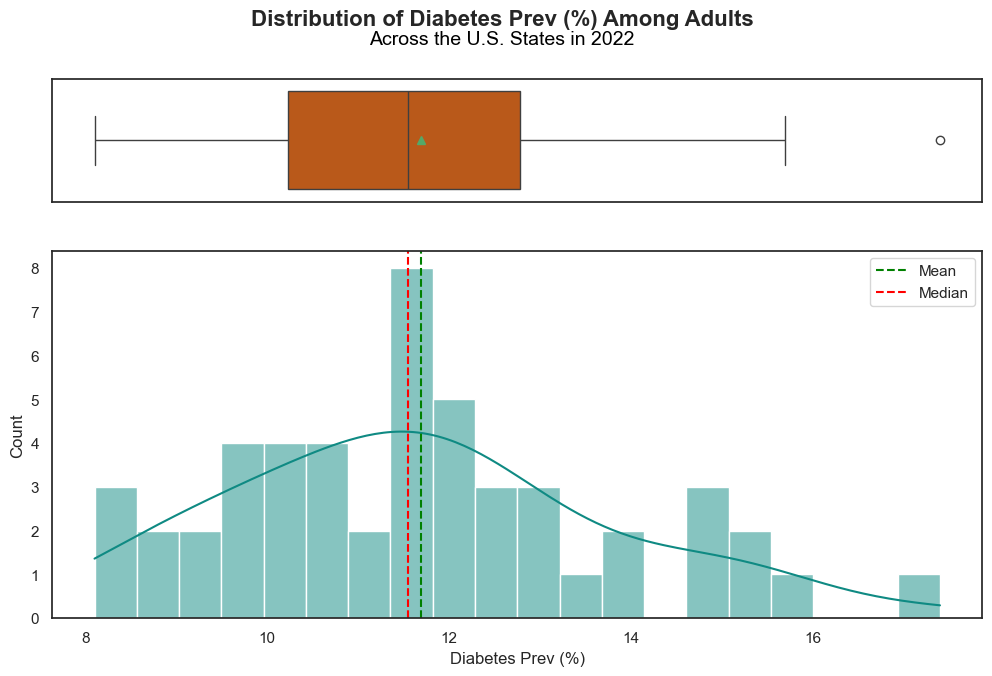

In [85]:
# add observations on dist for 5 chr diseases
#hist_features = ["Diabetes Prev (%)", "Obesity Prev (%)", "COPD Prev (%)", "Asthma Prev (%)", "Arthritis Prev (%)"]

#for feature in hist_features:
histogram_boxplot(df,"Diabetes Prev (%)", kde = True, bins=20)

### **Observations:**
#### Most states cluster between 10% and 15% diabetes prevalence, while a small number of states fall substantially below this range. The slight left skew indicates that lower-prevalence states modestly reduce the overall average.

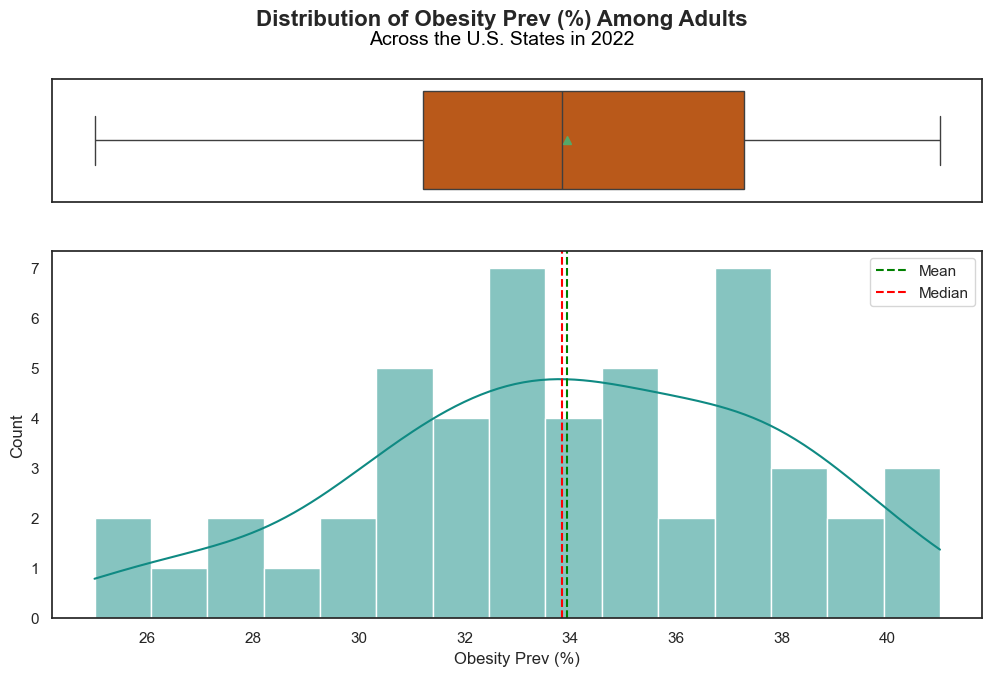

In [76]:
histogram_boxplot(df,"Obesity Prev (%)", kde=True)

## **Outliers Handling**

## **Bivariate Analysis**

<class 'matplotlib.colors.LinearSegmentedColormap'>


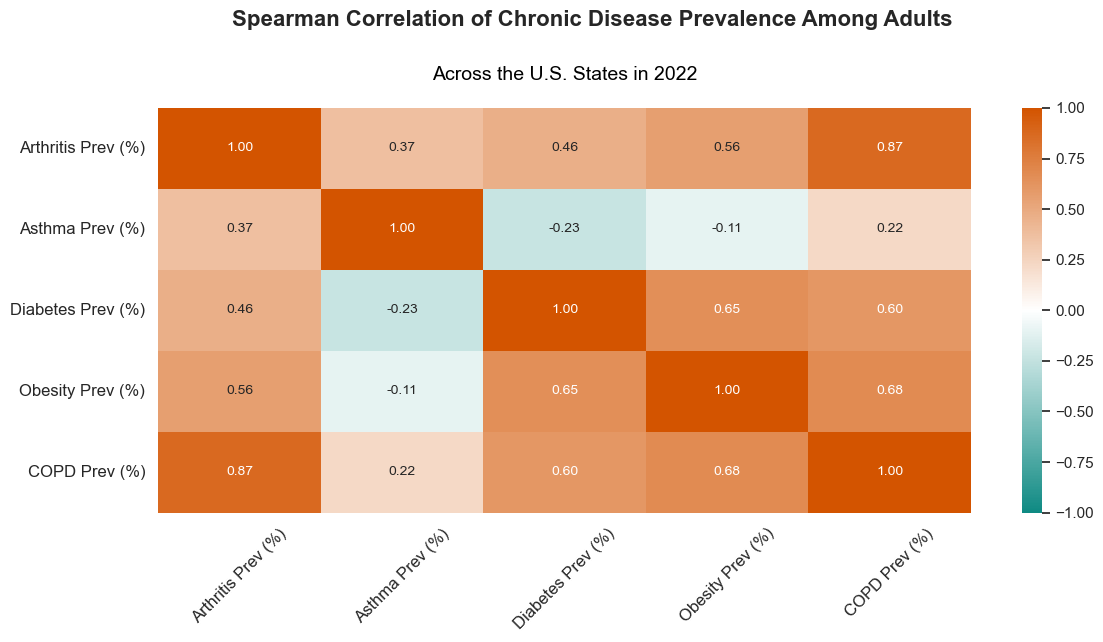

In [77]:
corr_cols = [
    'Arthritis Prev (%)',
    'Asthma Prev (%)',
    'Diabetes Prev (%)',
    'Obesity Prev (%)',
    'COPD Prev (%)'
]

create_corrplot(df, corr_cols, "spearman")

### **Observations**
### - States with higher obesity prevalence also tend to exhibit higher diabetes and COPD prevalence, suggesting overlapping chronic disease environments.
### - States with higher COPD prevalence also tend to have higher arthritis prevalence.

## **Multivariate Analysis**

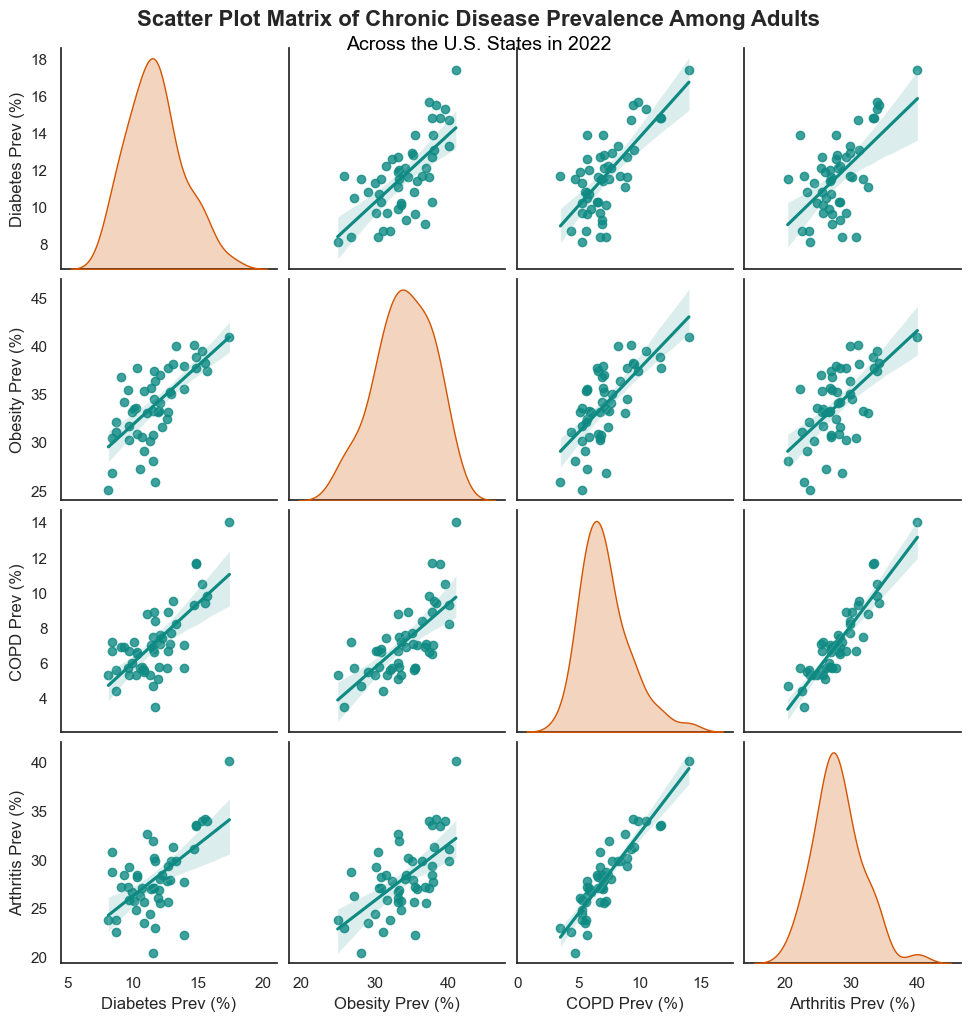

In [81]:
# Call function to create SPLOM for the chronic diseases that showed the most correlation
column_list = ["Diabetes Prev (%)", "Obesity Prev (%)", "COPD Prev (%)", "Arthritis Prev (%)"]

create_splom(df, column_list)


### **Observations:**
- Overall States that have higher levels of one chronic condition often have higher levels of others. In particular, obesity and diabetes show a clear upward pattern. Arthritis and COPD also appear strongly related. Chronic diseases seem to cluster rather than occur independently.
    - States with higher obesity prevalence generally exhibit higher diabetes prevalence, suggesting a meaningful association between the two conditions.
    - Higher obesity prevalence appears to be associated with higher COPD prevalence across states.
    - Arthritis and COPD prevalence appear strongly correlated, indicating that states with higher arthritis prevalence also tend to report higher COPD prevalence.
    - There are a few outliers but with no extreme anomalies. 

In [ ]:
# x_axis_columns = ['Overall - Arthritis-DataValue',
# 'Overall - Asthma-DataValue',
# 'Overall - COPD-DataValue',
# 'Overall - Obesity-DataValue',
# 'est - Pop 25 and Over – HS Graduate or Higher - %',
# 'est - Pop 16 and Over – Employed - %',
# 'est - Median Household Income',
# 'est - Pop Uninsured - %']


# y_axis_column = 'Overall - Diabetes-DataValue'

# plot_scatter_grid(df,
# x_cols=x_axis_columns,
# y_col = y_axis_column,
# ncols = 3,
# y_label = y_axis_column)

# # Action: make line thinner, remove CI, look at loop
# #copy/paste the cols from df.columns
# # combine above lists
# # write obs for key

In [ ]:
df.columns